In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()

In [70]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [71]:
X_train = X_train.reshape(-1, 28,28,1)/255
X_test = X_test.reshape(-1, 28,28,1)/255
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [72]:
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [73]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), padding='same',
                              activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=60, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=120, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 60)        16260     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 60)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 120)         64920     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 120)       

In [75]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [76]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.25)

Epoch 1/10
450/450 [==============================] - 31s 68ms/step - loss: 0.2341 - acc: 0.9292 - val_loss: 0.0713 - val_acc: 0.9778
Epoch 2/10
450/450 [==============================] - 28s 63ms/step - loss: 0.0541 - acc: 0.9831 - val_loss: 0.0530 - val_acc: 0.9846
Epoch 3/10
450/450 [==============================] - 28s 62ms/step - loss: 0.0359 - acc: 0.9890 - val_loss: 0.0410 - val_acc: 0.9871
Epoch 4/10
450/450 [==============================] - 28s 63ms/step - loss: 0.0276 - acc: 0.9912 - val_loss: 0.0400 - val_acc: 0.9889
Epoch 5/10
450/450 [==============================] - 28s 62ms/step - loss: 0.0230 - acc: 0.9928 - val_loss: 0.0412 - val_acc: 0.9875
Epoch 6/10
450/450 [==============================] - 29s 63ms/step - loss: 0.0173 - acc: 0.9944 - val_loss: 0.0388 - val_acc: 0.9875
Epoch 7/10
450/450 [==============================] - 28s 63ms/step - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0476 - val_acc: 0.9861
Epoch 8/10
450/450 [==============================] - 28s 63ms

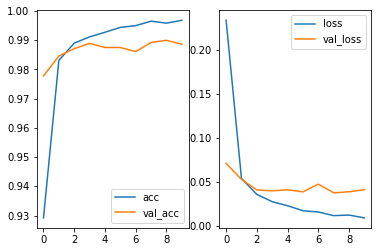

In [77]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [78]:
y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 3s 8ms/step


(10000, 10)

In [79]:
y_test[:20].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

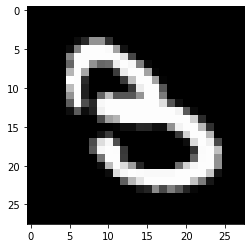

In [88]:
plt.imshow(X_test[18].reshape(28,28), cmap='gray')
pass

In [89]:
np.where(y_pred.argmax(axis=1) != y_test.argmax(axis=1))

(array([  18,  321,  326,  340,  449,  582,  625,  646,  659,  674,  740,
         924,  947, 1014, 1039, 1182, 1224, 1226, 1232, 1299, 1326, 1393,
        1621, 1709, 1716, 1878, 1901, 2035, 2130, 2135, 2182, 2462, 2597,
        2654, 2927, 2939, 2970, 3073, 3225, 3422, 3520, 3534, 3558, 3762,
        3767, 3808, 4176, 4201, 4224, 4360, 4443, 4504, 4731, 4761, 4807,
        5201, 5752, 5937, 5955, 5981, 5997, 6555, 6571, 6576, 6597, 6651,
        6755, 7619, 9642, 9664, 9679, 9729, 9839], dtype=int64),)

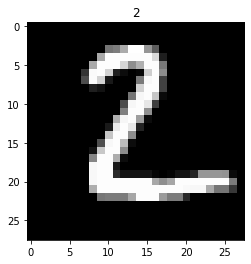

In [143]:
n = 1
plt.title(np.argmax(y_test[n]))
plt.imshow(X_test[n,:,:,0], cmap='gray')
